dados da temperatura:34 36 38 40 41 43 44 44 45 46 46
dados corrente:30.3 30.8 31.1 31.4 31.6 31.7 31.8 31.9 32 32.1 32.1
[-0.21209999999999596, 0.28790000000000404, 0.5879000000000048, 0.8879000000000019, 1.0879000000000048, 1.1879000000000026, 1.287900000000004, 1.387900000000002, 1.4879000000000033, 1.5879000000000048, 1.5879000000000048]


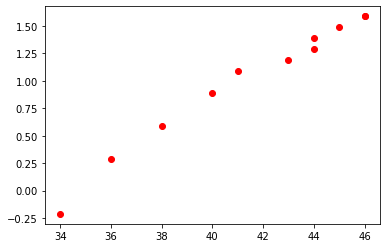

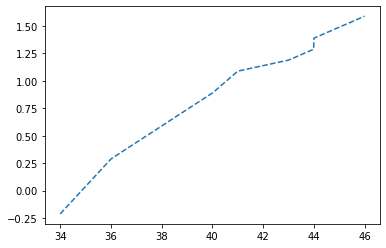

A e B: 0.1407685273665759 -4.80547878235072


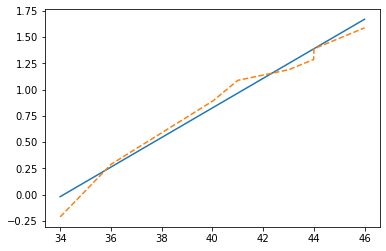

Corrente:32.1
temp:55
29.163209777189046
Corrente:0


In [5]:
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
dados = input('dados da temperatura:')
itens = dados.split()
Xtemp = list(map(float,itens))
tam= len(Xtemp)
#print(Xtemp)
dados = input('dados corrente:')
itens = dados.split()
Yamp = list(map(float,itens))
tam= len(Yamp)
Yref = list(range(0,tam))
#print(Yref)
for i in range(tam):
    Yref[i] = Yamp[i] - Yamp[0]*1.007
print(Yref)
plt.plot(Xtemp, Yref, 'ro')
plt.show()
f1 = interpolate.interp1d(Xtemp, Yref,kind = 'linear')
xnew= np.linspace(Xtemp[0],Xtemp[(tam-1)],1000)
f2 = f1(xnew)
plt.plot(xnew, f1(xnew), '--')
plt.show()
def reta(x, a, b):
    return a*x + b
pars, cov= curve_fit(f=reta,xdata=xnew,ydata=f2,bounds=[-np.inf,np.inf])
#A, B= pars[0], pars[1]
#A= round(A,6)
#B= round(B,6)
print("A e B:",*pars)
plt.plot(xnew, reta(xnew, *pars), '-', xnew, f1(xnew), '--')
plt.show()
for i in range(12):
    cDisplay = float(input('Corrente:'))
    if cDisplay == 0:
        break
    temp = float(input('temp:'))
    if temp == 0:
        break
    cCorrigida = cDisplay - reta(temp, *pars)
    print(cCorrigida)